# Residency Project Deliverable: 1
# Rutu Shah
# Nischal Joshi
# Murali Krishna
# Santhosh Ramachandran 

In [658]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')




In [659]:
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

In [660]:


#explore the dataset
print("Printing head()\n", df.head())
print("Printing describe()\n", df.describe())
print("Printing info()\n", df.info())


Printing head()
    id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             norma

In [661]:
# Check for missing values in each column
print(df.isnull)


<bound method DataFrame.isnull of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  Fal

In [662]:
for c in df.columns:
    miss = df[c].isnull().sum()
    print("{} has {} missing value(s)".format(c,miss))

id has 0 missing value(s)
age has 0 missing value(s)
sex has 0 missing value(s)
dataset has 0 missing value(s)
cp has 0 missing value(s)
trestbps has 59 missing value(s)
chol has 30 missing value(s)
fbs has 90 missing value(s)
restecg has 2 missing value(s)
thalch has 55 missing value(s)
exang has 55 missing value(s)
oldpeak has 62 missing value(s)
slope has 309 missing value(s)
ca has 611 missing value(s)
thal has 486 missing value(s)
num has 0 missing value(s)


In [663]:
#Performing data cleaning steps

#Handling missing values

#dropping rows of gender having 1 missing value and family having 2 missing values

df = df.dropna(subset=['slope', 'restecg'])

if df['age'].isnull().sum() > 0:
    df['age'] = df['age'].fillna(method='ffill')
if df['fbs'].isnull().sum() > 0:
    df['fbs'] = df['fbs'].fillna(method='ffill')
if df['thalch'].isnull().sum() > 0:
    df['thalch'] = df['thalch'].fillna(method='ffill')
if df['exang'].isnull().sum() > 0:
    df['exang'] = df['exang'].fillna(method='ffill')
if df['ca'].isnull().sum() > 0:
    df['ca'] = df['ca'].fillna(method='ffill')
if df['thal'].isnull().sum() > 0:
    df['thal'] = df['thal'].fillna(method='ffill')

# If you have columns like 'chol' or 'thalach' with missing — you can fill them too
# Here replacing *example* columns:
if 'chol' in df.columns and df['chol'].isnull().sum() > 0:
    df['chol'] = df['chol'].fillna(method='bfill')
if 'trestbps' in df.columns and df['trestbps'].isnull().sum() > 0:
    df['trestbps'] = df['trestbps'].fillna(method='bfill')
if 'thalach' in df.columns and df['thalach'].isnull().sum() > 0:
    df['thalach'] = df['thalach'].fillna(method='bfill')
if 'oldpeak' in df.columns and df['oldpeak'].isnull().sum() > 0:
    df['oldpeak'] = df['oldpeak'].fillna(method='bfill')
if 'slope' in df.columns and df['slope'].isnull().sum() > 0:
    df['slope'] = df['slope'].fillna(method='bfill')
if 'ca' in df.columns and df['ca'].isnull().sum() > 0:
    df['ca'] = df['ca'].fillna(method='bfill')
if 'thal' in df.columns and df['thal'].isnull().sum() > 0:
    df['thal'] = df['thal'].fillna(method='bfill')


# Check result
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [664]:
#checking for inconsistent data
# Check duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows found: {duplicates}")

Duplicate rows found: 0


In [665]:
# Convert numeric columns
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['chol'] = pd.to_numeric(df['chol'], errors='coerce')

# Check inconsistent values
print(df[df['age'] < 0])  # unlikely
print(df[df['chol'] < 0]) # unlikely

Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num]
Index: []
Empty DataFrame
Columns: [id, age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, num]
Index: []


In [666]:
# Detect noisy age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['age'] >= lower) & (df['age'] <= upper)]

print(f"\nAge IQR Analysis:\nQ1: {Q1}\nQ3: {Q3}\nIQR: {IQR}\nLower Bound: {lower}\nUpper Bound: {upper}")



Age IQR Analysis:
Q1: 49.0
Q3: 61.0
IQR: 12.0
Lower Bound: 31.0
Upper Bound: 79.0


In [667]:
# Detect noisy cholesterol
if 'chol' in df.columns:
    chol_upper = df['chol'].quantile(0.99)
    df = df[df['chol'] <= chol_upper]
    print(f"Cholesterol upper bound (99th percentile): {chol_upper}")


Cholesterol upper bound (99th percentile): 406.7599999999999


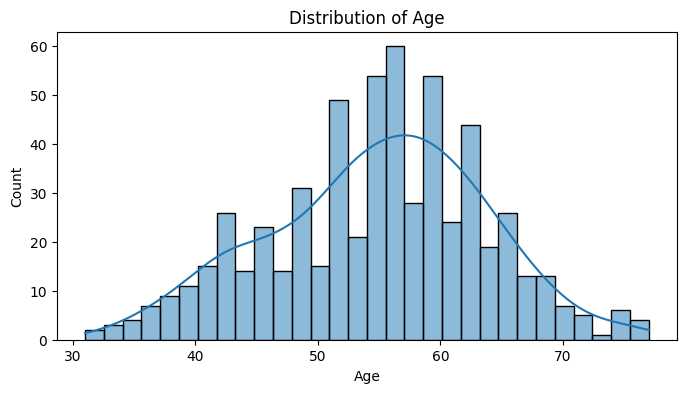

In [668]:
#Exploratory data analysis on Age Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


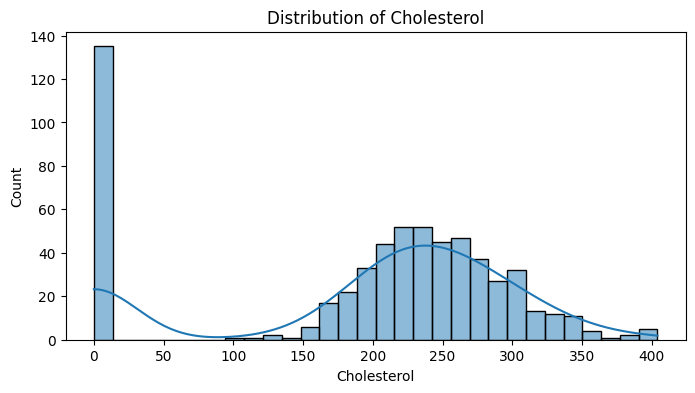

In [669]:
#Exploratory data analysis Cholesterol
if 'chol' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['chol'], bins=30, kde=True)
    plt.title("Distribution of Cholesterol")
    plt.xlabel("Cholesterol")
    plt.ylabel("Count")
    plt.show()

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


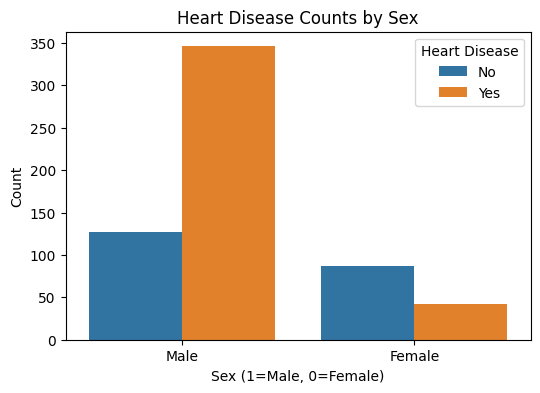

In [670]:
# Checking the target column
print(df.columns)

#renaming it to nu,
if 'target' not in df.columns and 'num' in df.columns:
    df.rename(columns={'num': 'target'}, inplace=True)

#converting to binary
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Now plot
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=df)
plt.title("Heart Disease Counts by Sex")
plt.xlabel("Sex (1=Male, 0=Female)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


In [671]:
# Since the data is not all numerical, we need to convert them to labels
# Identify categorical columns (usually dtype == object or string)
categorical_cols = df.select_dtypes(include=['object']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [672]:
numeric_cols

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'], dtype='object')

In [673]:
categorical_cols

Index(['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal'], dtype='object')

In [674]:
from sklearn.preprocessing import LabelEncoder

#Using LabelEncoder to convert the string values to numeric labels
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [675]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,1,0,3,145.0,233.0,True,0,150.0,False,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,False,0,108.0,True,1.5,1,3.0,1,1
2,3,67,1,0,0,120.0,229.0,False,0,129.0,True,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,False,1,187.0,False,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,False,0,172.0,False,1.4,2,0.0,1,0


In [676]:
from sklearn.model_selection import train_test_split

In [677]:
X = df[df.columns[:15]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [678]:
X.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [679]:
X.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,1,0,3,145.0,233.0,True,0,150.0,False,2.3,0,0.0,0
1,2,67,1,0,0,160.0,286.0,False,0,108.0,True,1.5,1,3.0,1
2,3,67,1,0,0,120.0,229.0,False,0,129.0,True,2.6,1,2.0,2
3,4,37,1,0,2,130.0,250.0,False,1,187.0,False,3.5,0,0.0,1
4,5,41,0,0,1,130.0,204.0,False,0,172.0,False,1.4,2,0.0,1


In [680]:
y.info()

<class 'pandas.core.series.Series'>
Index: 602 entries, 0 to 912
Series name: target
Non-Null Count  Dtype
--------------  -----
602 non-null    int64
dtypes: int64(1)
memory usage: 9.4 KB


In [681]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [682]:
X_train[:1]

array([[ 1.56329208, -0.78499279,  0.56072318,  1.75572355,  1.33924588,
        -1.51089205, -1.74833005, -0.41926275,  1.77689742, -1.11378137,
         1.05113991, -0.15085608, -2.00951749, -0.72308762,  0.957101  ]])

In [683]:
# Choosing different neighbors to test their accuracy 
k_values = [1,5,11,16,19]

In [684]:
np.isnan(X_train)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [685]:
knn_results = {}

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train KNN models with different k values
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_results[k] = accuracy

In [686]:
print("Results of Classification Methods:")
print("KNN:")
for k, accuracy in knn_results.items():
    print(f"k = {k}, Accuracy: {accuracy:.2f}")

Results of Classification Methods:
KNN:
k = 1, Accuracy: 0.79
k = 5, Accuracy: 0.83
k = 11, Accuracy: 0.86
k = 16, Accuracy: 0.84
k = 19, Accuracy: 0.85


Text(0.5, 1.0, 'Accuracy vs k for KNN')

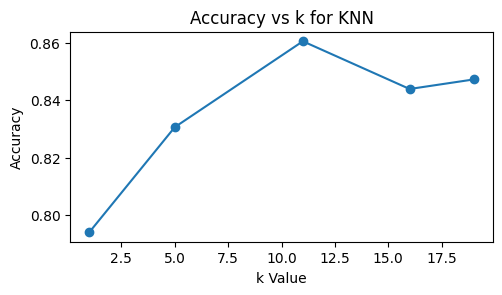

In [687]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(list(knn_results.keys()), list(knn_results.values()), marker='o')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k for KNN')

## Decision Tree Classification

In [688]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [689]:

classifier_y_pred = classifier.predict(X_test)

In [690]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, classifier_y_pred))
print('Accuracy:', accuracy_score(y_test,classifier_y_pred))

[[ 67  33]
 [ 38 163]]
Accuracy: 0.7641196013289037


In [691]:
# Visualizing the result
from sklearn import tree

text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_0 <= 0.34
|   |--- feature_14 <= 0.19
|   |   |--- feature_13 <= 1.01
|   |   |   |--- feature_11 <= 1.37
|   |   |   |   |--- feature_9 <= -1.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_9 >  -1.00
|   |   |   |   |   |--- feature_5 <= 1.05
|   |   |   |   |   |   |--- feature_5 <= -0.93
|   |   |   |   |   |   |   |--- feature_0 <= -0.91
|   |   |   |   |   |   |   |   |--- feature_11 <= -0.78
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_11 >  -0.78
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  -0.91
|   |   |   |   |   |   |   |   |--- feature_1 <= -0.45
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_1 >  -0.45
|   |   |   |   |   |   |   |   |   |--- feature_1 <= -0.22
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_1 >  -0.22
|   |   |   |   |   | 

In [692]:
# Get feature names
feature_names = ['id',
 'age',
 'sex',
 'dataset',
 'chest pain type',
 'resting blood pressure',
 'cholesterol',
 'fasting blood sugar',
 'restecg',
 'max heart rate',
 'excercise induced angina',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 '',]

In [693]:
# Get target name
target_name = list(df.columns[15:])
target_name.append('')
target_name

['target', '']

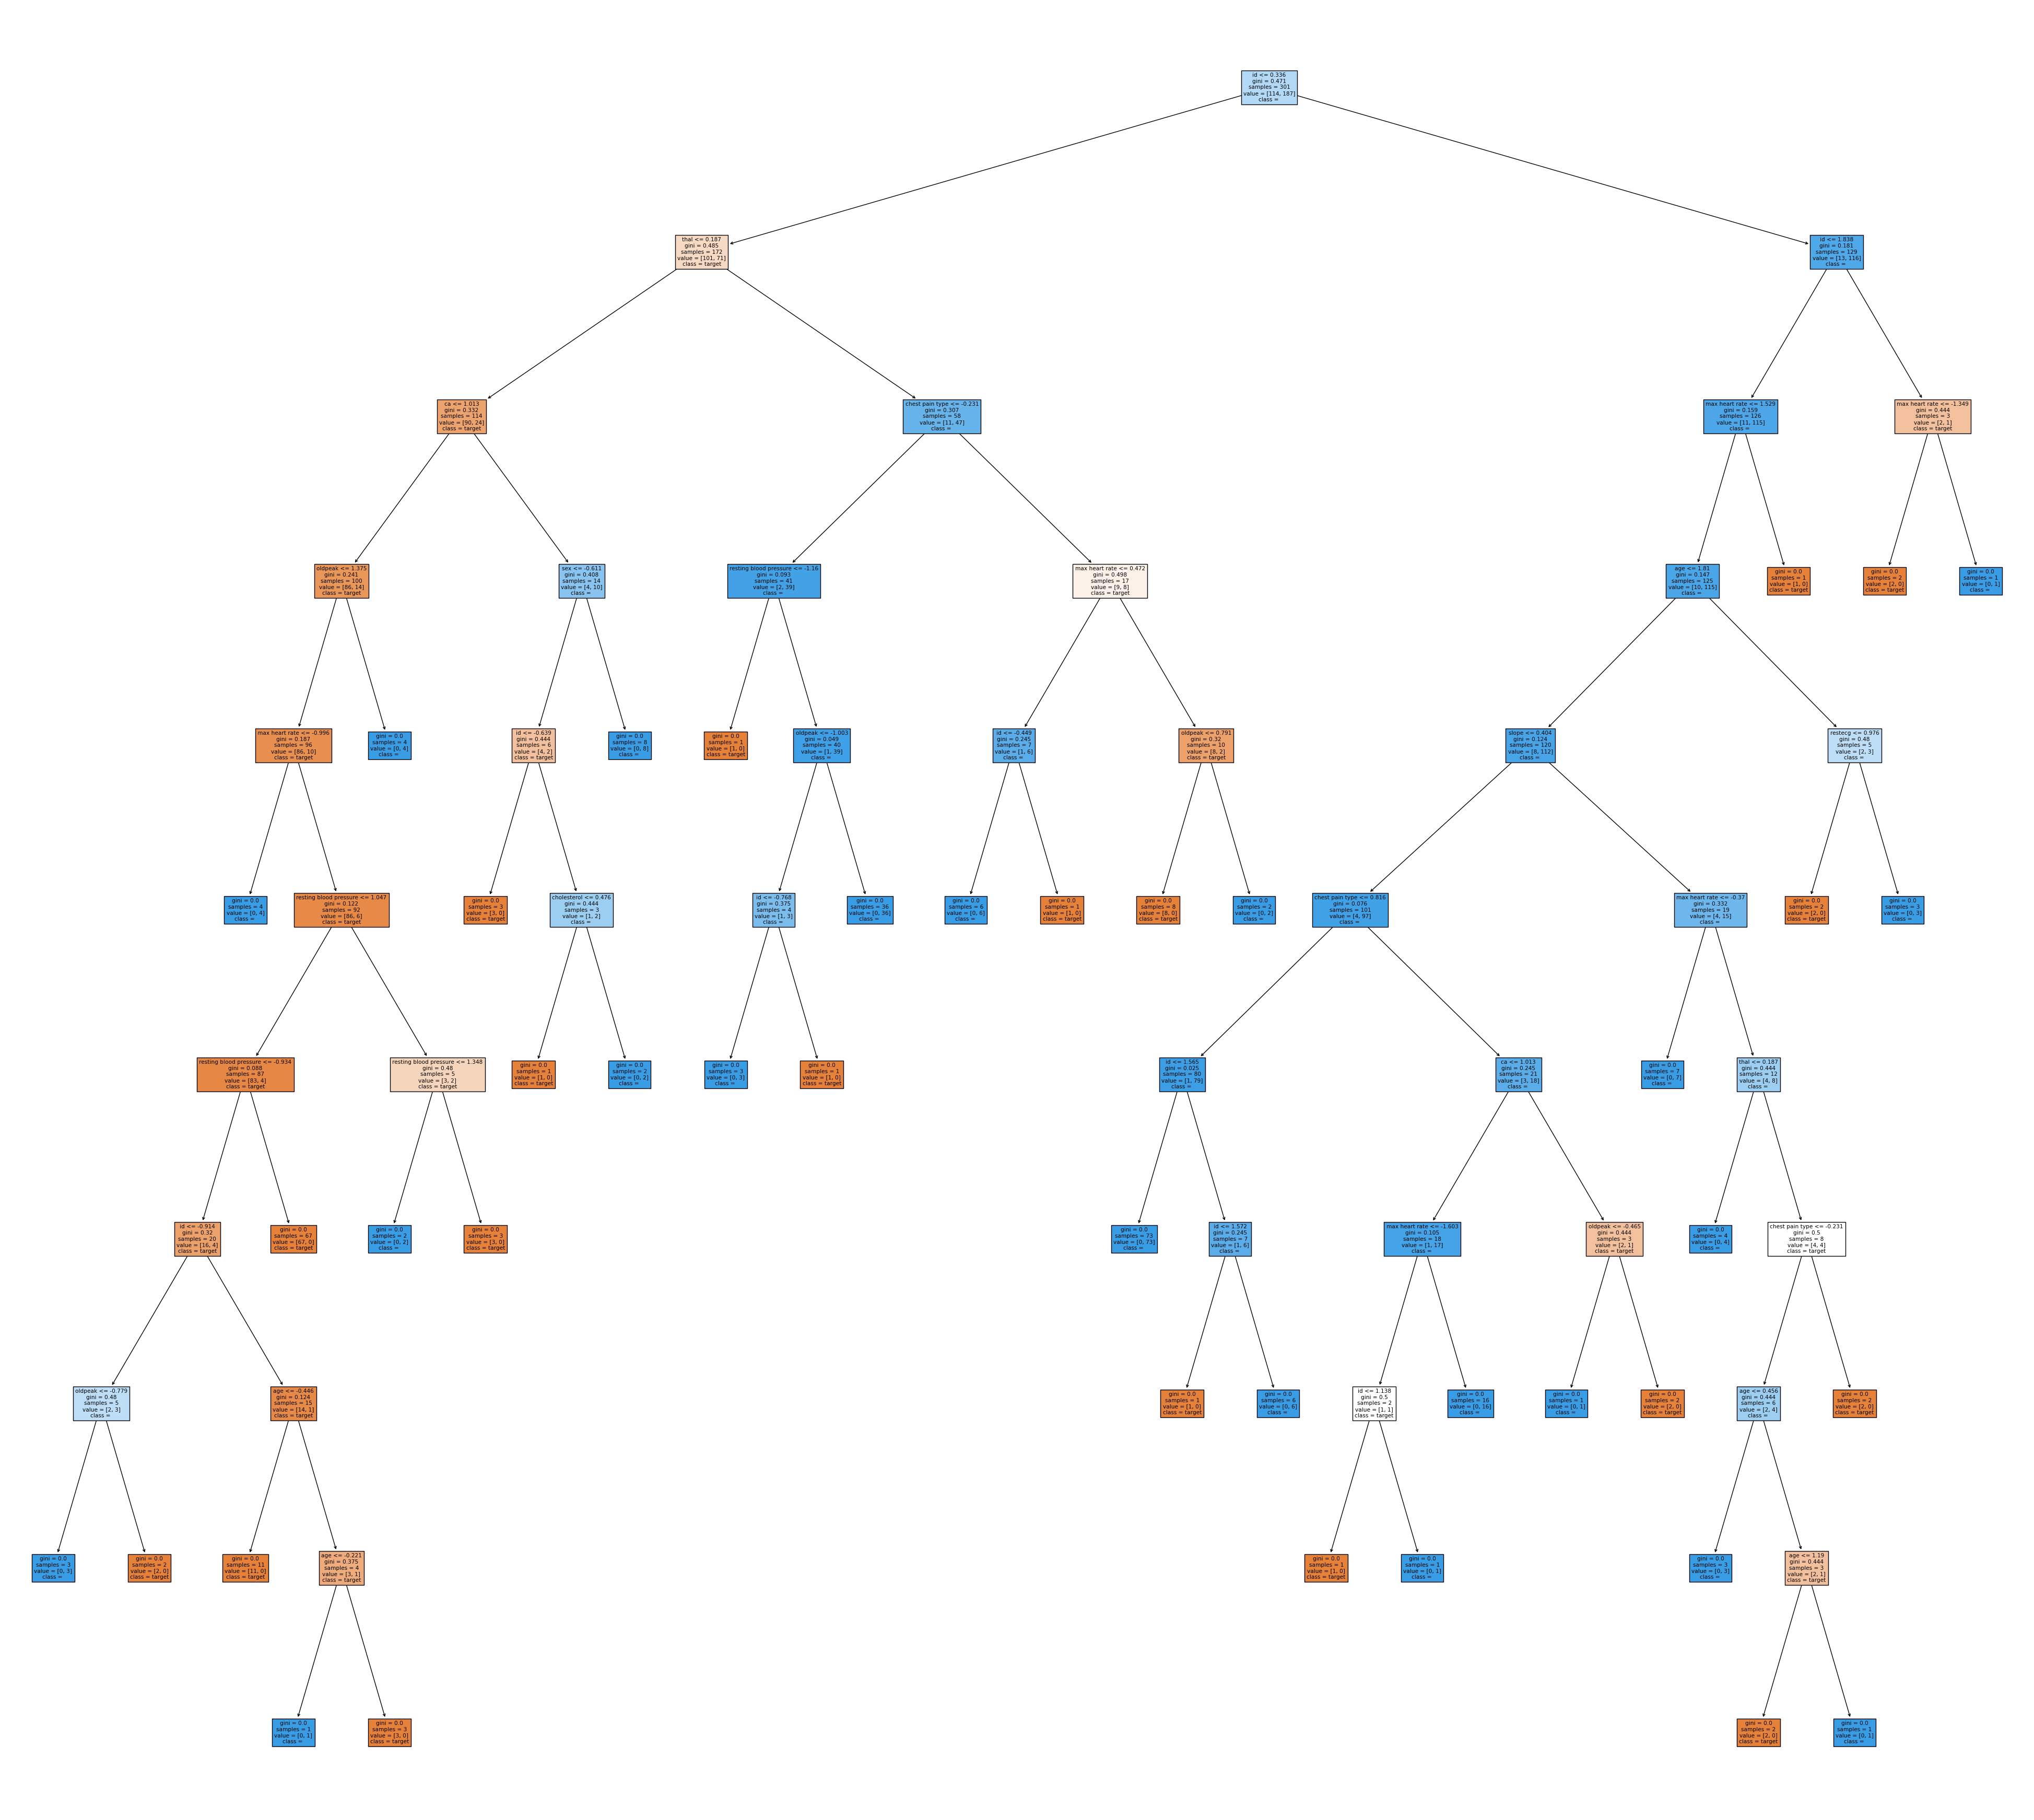

In [694]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(classifier, 
                   feature_names= feature_names, class_names=target_name, filled=True)

### Hyperparameter Tuning - KNN

In [695]:
from sklearn.model_selection import GridSearchCV

## Using GridSearchCV to identify to best performing parameter
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Best score: 0.8704918032786886


### Performance Evaluation - KNN

In [696]:
# Evaluating the classification model performance on the parameters with highest score provided by GridSearchCV
knnModel = KNeighborsClassifier(n_neighbors= 7, weights='distance', metric= 'manhattan')
knnModel.fit(X_train, y_train)
# Predictions
y_pred = knnModel.predict(X_test)
y_proba = knnModel.predict_proba(X_test)[:, 1] 

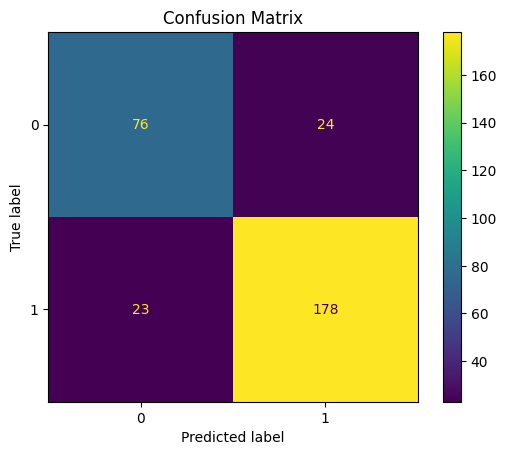

In [697]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay
)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [698]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.844
Precision: 0.881
Recall: 0.886
F1 Score: 0.883


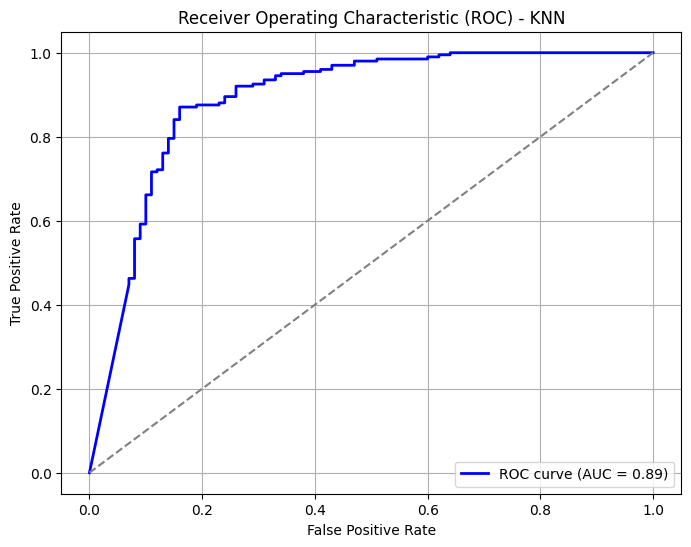

In [699]:
# ROC Curve + AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) - KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Hyperparameter Tuning - Decision Tree

In [700]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)

Best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}
Best score: 0.8539890710382514


### Performance Metrics - Decision Tree

In [701]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
# Predictions
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:, 1]  # Needed for ROC

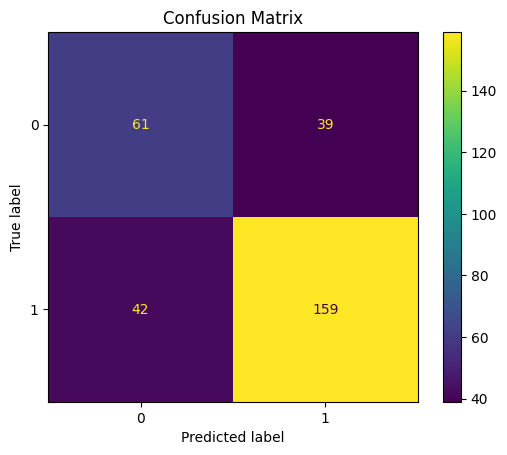

In [702]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [703]:
# Accuracy, Precision, Recall, F1
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.731
Precision: 0.803
Recall: 0.791
F1 Score: 0.797


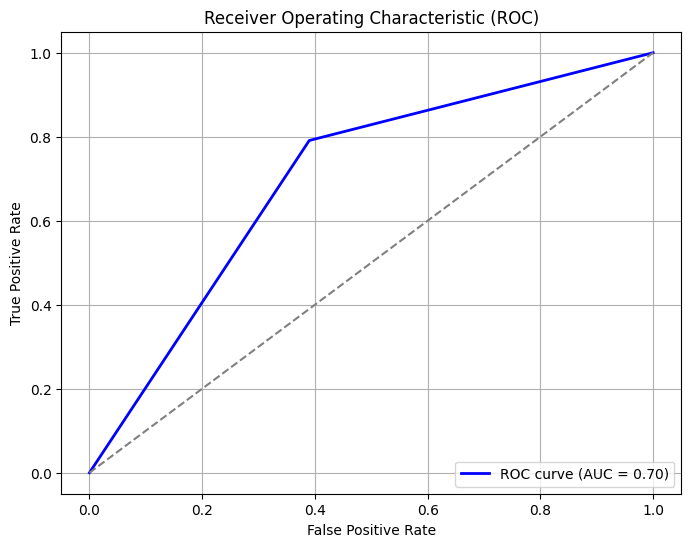

In [704]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Clustering

In [705]:
from sklearn.cluster import KMeans

In [706]:
X = df.iloc[:, :-1]  # First 15 columns (excluding the target)
y = df.iloc[:, -1]   # Last column is the target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [707]:

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_labels

array([4, 2, 2, 4, 1, 4, 2, 1, 2, 2, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1,
       4, 4, 2, 1, 1, 1, 4, 2, 1, 2, 4, 4, 4, 4, 2, 2, 2, 4, 2, 4, 1, 4,
       1, 4, 4, 2, 4, 1, 4, 4, 4, 2, 2, 4, 4, 4, 4, 1, 1, 2, 1, 2, 2, 4,
       4, 2, 4, 1, 2, 2, 4, 4, 1, 2, 1, 4, 2, 2, 1, 4, 2, 4, 4, 4, 1, 1,
       1, 4, 2, 2, 1, 1, 4, 2, 2, 4, 4, 4, 4, 1, 1, 2, 4, 4, 4, 2, 4, 1,
       2, 4, 2, 1, 4, 4, 1, 2, 2, 2, 4, 2, 4, 1, 2, 2, 4, 1, 4, 4, 4, 1,
       1, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 1, 4, 1, 2, 2, 2, 4, 4,
       2, 4, 4, 2, 1, 1, 4, 4, 4, 1, 4, 1, 2, 2, 1, 1, 2, 2, 2, 2, 4, 4,
       4, 4, 2, 1, 1, 4, 2, 4, 2, 4, 2, 2, 2, 1, 2, 4, 1, 1, 4, 1, 1, 4,
       1, 4, 2, 2, 2, 4, 1, 1, 4, 4, 2, 4, 4, 1, 1, 2, 4, 1, 1, 1, 2, 2,
       1, 4, 1, 2, 2, 1, 0, 4, 1, 1, 2, 2, 4, 1, 4, 4, 1, 1, 4, 1, 2, 4,
       2, 4, 4, 2, 2, 2, 1, 4, 1, 1, 1, 4, 4, 1, 1, 1, 4, 2, 0, 4, 4, 4,
       4, 2, 4, 2, 1, 4, 4, 1, 1, 4, 1, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4,
       1, 2, 2, 1, 4, 2, 1, 4, 2, 2, 1, 4, 4, 4, 4,

In [708]:
# Add the cluster labels to the DataFrame for plotting
df['Cluster'] = kmeans_labels

 # Use PCA to reduce to 2D for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


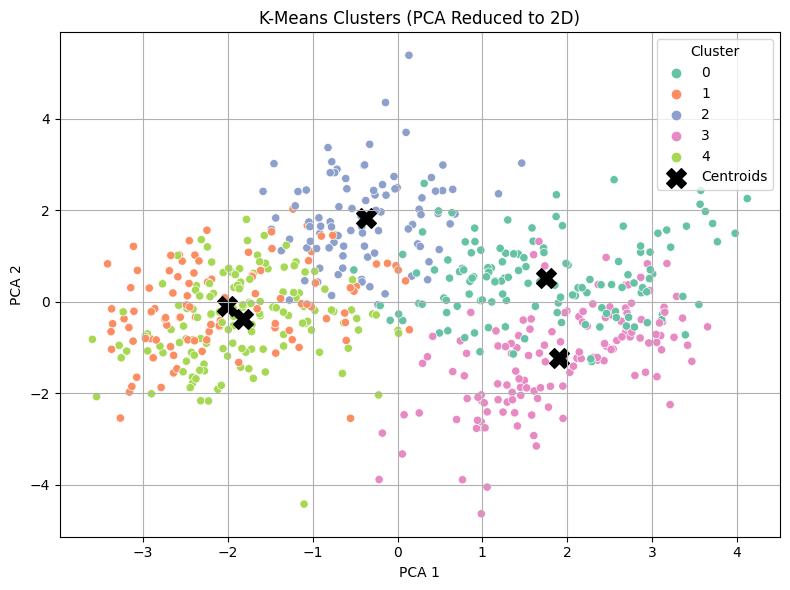

In [724]:
# Plot the clusters in 2D PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette="Set2")
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
            pca.transform(kmeans.cluster_centers_)[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title("K-Means Clusters (PCA Reduced to 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid()
plt.tight_layout()
plt.savefig("kmeans_clusters.png", dpi=300)  # <-- Save the figure
plt.show()


## Identifying patterns



In [710]:
# One-hot encode categorical features only
X = pd.get_dummies(X)
X

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,1,0,3,145.0,233.0,True,0,150.0,False,2.3,0,0.0,0
1,2,67,1,0,0,160.0,286.0,False,0,108.0,True,1.5,1,3.0,1
2,3,67,1,0,0,120.0,229.0,False,0,129.0,True,2.6,1,2.0,2
3,4,37,1,0,2,130.0,250.0,False,1,187.0,False,3.5,0,0.0,1
4,5,41,0,0,1,130.0,204.0,False,0,172.0,False,1.4,2,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,905,57,1,3,0,130.0,207.0,False,2,96.0,True,1.0,1,0.0,2
908,909,74,1,3,0,155.0,310.0,False,1,112.0,True,1.5,0,0.0,2
910,911,51,0,3,0,114.0,258.0,True,0,96.0,False,1.0,2,0.0,2
911,912,62,1,3,0,160.0,254.0,True,2,108.0,True,3.0,1,0.0,2


In [711]:
from mlxtend.frequent_patterns import apriori, association_rules

# Converting all the data into binary representation to make it usable for FP-Growth algorithm
df['Age>60'] = df['age'] > 60
df['Male'] = df['sex'] == 1
df['BP>130'] = df['trestbps'] > 130
df['Chol>240'] = df['chol'] > 240
df['HighFBS'] = df['fbs'] == 1
df['Thalach<150'] = df['thalch'] < 150
df['ExerciseAngina'] = df['exang'] == 1
df['Oldpeak>2'] = df['oldpeak'] > 2.0
df['Vessels>0'] = df['ca'] > 0
df['HasDisease'] = df['target'] == 1






In [712]:
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], prefix_sep='_')
df.head()


,id,age,sex,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,...,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2
0,1,63,1,0,145.0,233.0,True,150.0,False,2.3,...,True,True,False,False,True,False,False,True,False,False
1,2,67,1,0,160.0,286.0,False,108.0,True,1.5,...,False,True,False,False,False,True,False,False,True,False
2,3,67,1,0,120.0,229.0,False,129.0,True,2.6,...,False,True,False,False,False,True,False,False,False,True
3,4,37,1,0,130.0,250.0,False,187.0,False,3.5,...,False,False,True,False,True,False,False,False,True,False
4,5,41,0,0,130.0,204.0,False,172.0,False,1.4,...,False,True,False,False,False,False,True,False,True,False


In [713]:
binary_df = df.drop(columns=['id', 'age', 'Cluster', 'sex', 'dataset', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'])  # drop raw columns

# Ensure all are 0/1
binary_df = binary_df.astype(int)


In [714]:
binary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 602 entries, 0 to 912
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   fbs             602 non-null    int64
 1   exang           602 non-null    int64
 2   Age>60          602 non-null    int64
 3   Male            602 non-null    int64
 4   BP>130          602 non-null    int64
 5   Chol>240        602 non-null    int64
 6   HighFBS         602 non-null    int64
 7   Thalach<150     602 non-null    int64
 8   ExerciseAngina  602 non-null    int64
 9   Oldpeak>2       602 non-null    int64
 10  Vessels>0       602 non-null    int64
 11  HasDisease      602 non-null    int64
 12  cp_0            602 non-null    int64
 13  cp_1            602 non-null    int64
 14  cp_2            602 non-null    int64
 15  cp_3            602 non-null    int64
 16  restecg_0       602 non-null    int64
 17  restecg_1       602 non-null    int64
 18  restecg_2       602 non-null    int

In [715]:
binary_df.head()

,fbs,exang,Age>60,Male,BP>130,Chol>240,HighFBS,Thalach<150,ExerciseAngina,Oldpeak>2,...,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2
0,1,0,1,1,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,0,0
1,0,1,1,1,1,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
2,0,1,1,1,0,0,0,1,1,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [716]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

frequent_items = fpgrowth(binary_df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_items, metric='confidence', min_threshold=0.6)

# Focus on disease prediction
rules = rules[rules['consequents'].astype(str).str.contains('HasDisease')]

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                         antecedents         consequents   support  \
1                           (BP>130)        (HasDisease)  0.308970   
5                     (Male, BP>130)        (HasDisease)  0.267442   
7                           (BP>130)  (Male, HasDisease)  0.267442   
8              (Thalach<150, BP>130)        (HasDisease)  0.247508   
12       (Thalach<150, Male, BP>130)        (HasDisease)  0.219269   
...                              ...                 ...       ...   
2667               (cp_0, restecg_1)  (Male, HasDisease)  0.264120   
2671               (Male, restecg_1)        (HasDisease)  0.328904   
2673        (Thalach<150, restecg_1)        (HasDisease)  0.295681   
2676  (Thalach<150, Male, restecg_1)        (HasDisease)  0.270764   
2678        (Thalach<150, restecg_1)  (Male, HasDisease)  0.270764   

      confidence      lift  
1       0.701887  1.089010  
5       0.785366  1.218532  
7       0.607547  1.057062  
8       0.856322  1.328623  
12      0.8979

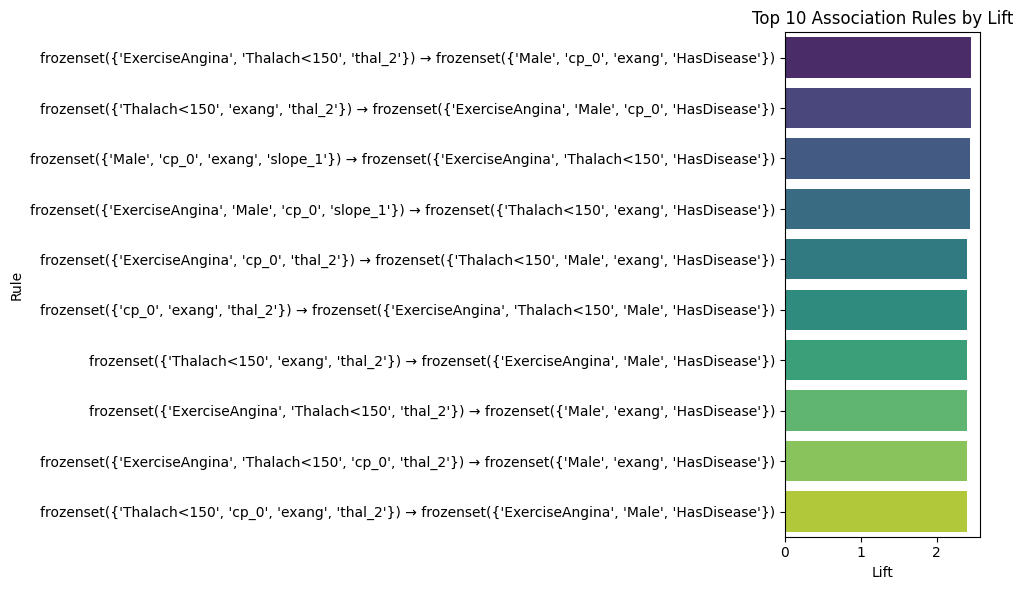

In [725]:
# Sort by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y=top_rules['antecedents'].astype(str) + ' → ' + top_rules['consequents'].astype(str),
            data=top_rules, palette='viridis')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule')
plt.tight_layout()
plt.savefig("association_rules_top10.png", dpi=300) 
plt.show()

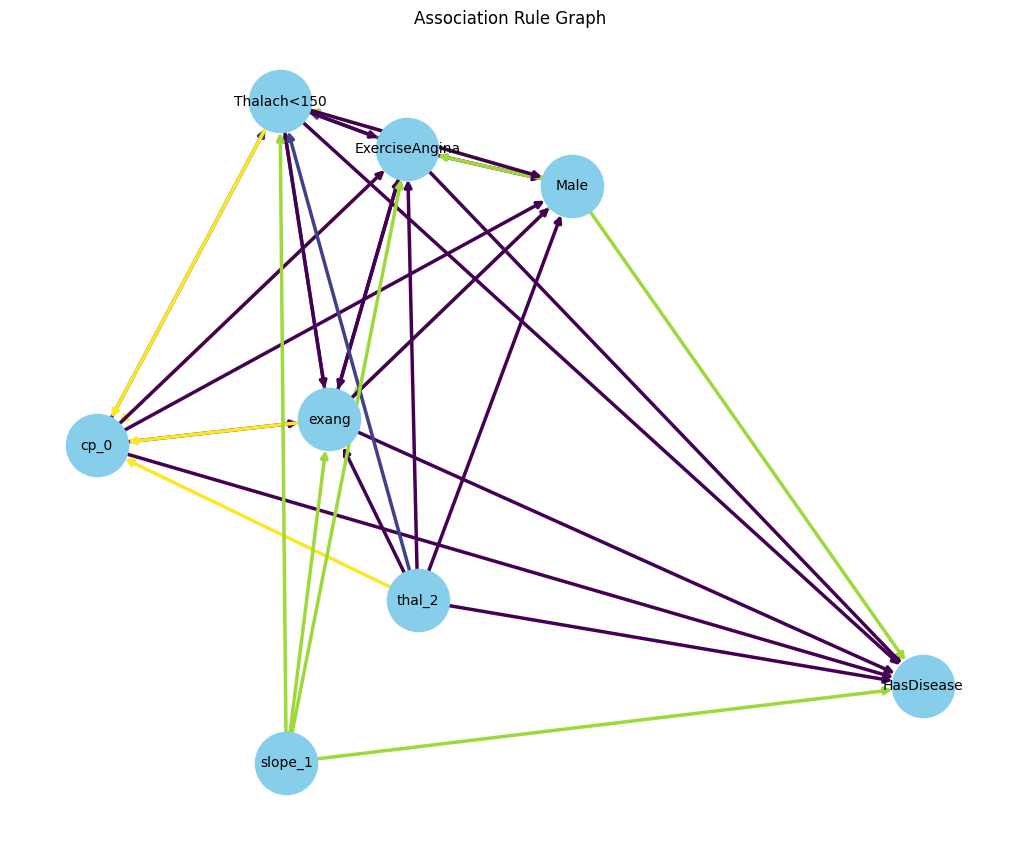

In [726]:
import networkx as nx

G = nx.DiGraph()

for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(str(antecedent), str(consequent), weight=row['lift'])

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
edge_weights = [G[u][v]['weight'] for u,v in G.edges()]
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=edge_weights,
        width=2.5, edge_cmap=plt.cm.viridis, node_size=2000, font_size=10)
plt.title('Association Rule Graph')
plt.savefig("association_rules_graph.png", dpi=300)
plt.show()


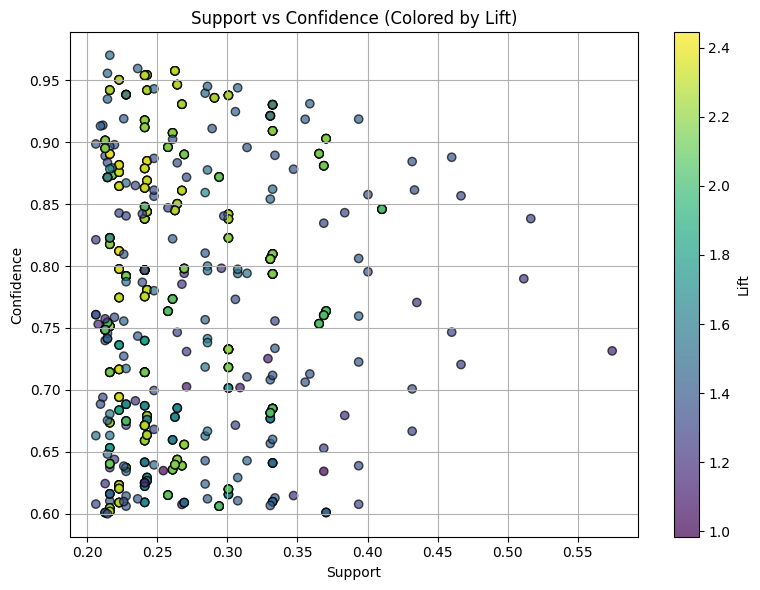

In [727]:
### Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7, c=rules['lift'], cmap='viridis', edgecolors='k')

plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence (Colored by Lift)')
plt.grid(True)
plt.tight_layout()
plt.savefig("support_vs_confidence.png", dpi=300)
plt.show()